<a href="https://colab.research.google.com/github/kayleefoor/Foor_DSPN_S24/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [4]:
if (!require(readr)) install.packages("readr")
library(readr)
if (!require(dplyr)) install.packages("dplyr")
library(dplyr)

df <- read_csv("https://raw.githubusercontent.com/CoAxLab/DataSciencePsychNeuro/53424ae411f58eeda82b2663e123e7d91b27606d/Homework%20datasets/hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv")
head(df)

d1 <- df %>%
    select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
    na.omit()
head(d1)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 1206 Columns: 500
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (64): Release, Acquisition, Gender, Age, NEORAW_01, NEORAW_02, NEORAW_...
dbl  (434): Subject, MMSE_Score, PSQI_Score, PSQI_Comp1, PSQI_Comp2, PSQI_Co...
time   (2): PSQI_BedTime, PSQI_GetUpTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
100206,M,130.42,543134,807245
100307,F,112.56,407292,664124
100408,M,121.18,500417,726206
100610,M,126.53,512946,762308
101006,F,101.85,429449,579632
101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

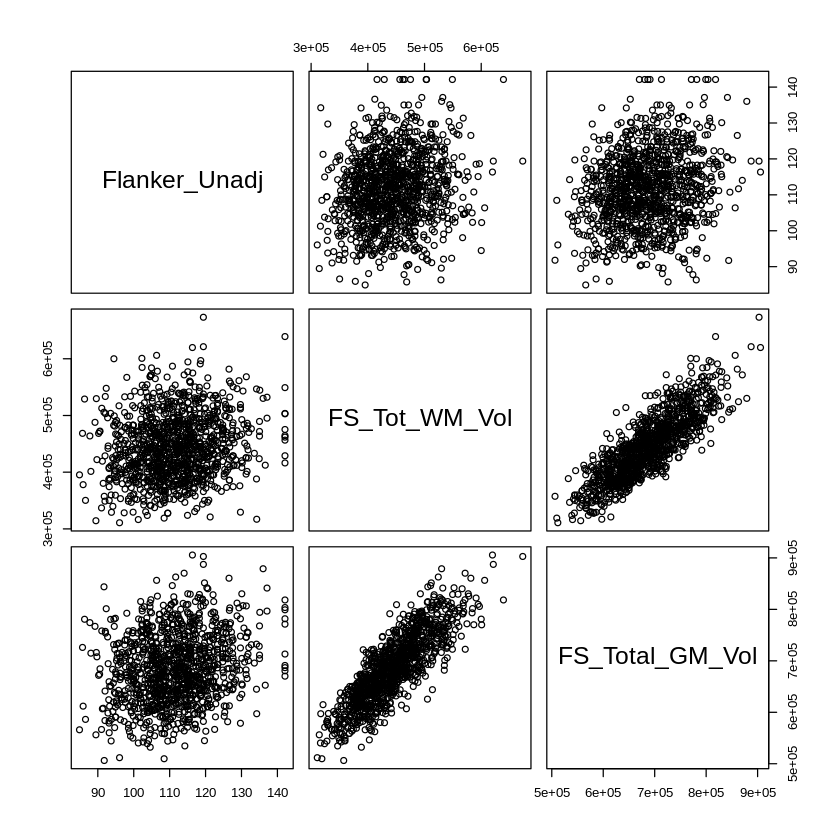

In [18]:
#INSERT CODE HERE
d1 %>% select(-Subject,-Gender) %>% pairs()

> *White matter and grey matter appear to be positively correlated, while all other pairs do not appear to be correlated. Gender was excluded from the correlation plots because it is a binary character variable, and subject ID was excluded because no meaningful conclusions would be drawn by plotting that data.*
>

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [23]:
lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1) %>% summary()
lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1) %>% confint(level = 0.95)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> *The mean beta_0 coefficient is 9.026e+01 and the mean beta_1 coefficient is 3.110e-05. The confidence interval for beta_0 is (8.428917e+01, 9.622375e+01). The confidence interval for beta_1 is (2.244198e-05,	3.975733e-05).*
>*According to this model, grey matter volume is significantly positively associated with Flanker Task performance.*

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see.

Loading required package: ggplot2

`geom_smooth()` using formula = 'y ~ x'


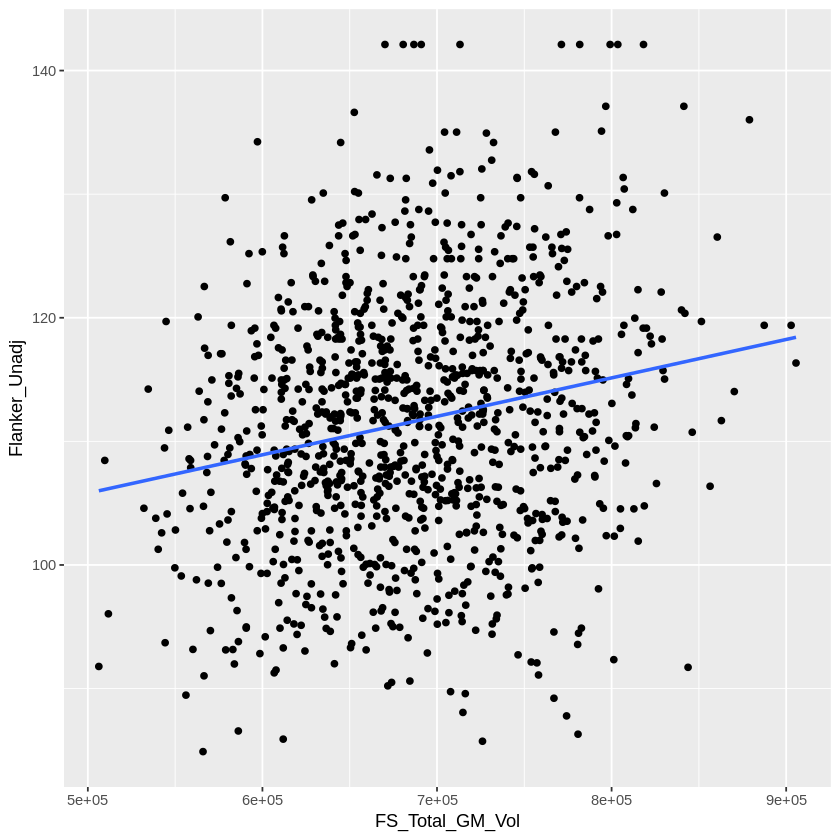

In [25]:
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

d1 %>%
    ggplot(aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

> *While the scatterplot does not portray a visual relationship between the variables on its own, the inclusion of the regression line shows a positive linear relationship.*
>

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *I conclude that people with greater grey matter volume perform better on the Flanker task compared to those with less grey matter volume to a statistically significant degree.*
>

**DUE:** 5pm EST, February 24, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*